# **心臟病數據分析** 

## **關於心臟病**

> 據世界衛生組織統計，每年有 1790 萬人死於心髒病。醫學研究表明，人類的生活方式是導致這種心臟問題的主要原因。除此之外，還有許多可能是心臟病成因的重要因素。我們將從從病理資料集中，以數據分析作為起點搭配創建合適的機器學習技術來更準確地對心臟病進行分類，這對醫療組織和患者都非常有幫助。

## 匯入套件

In [2]:
#loading dataset
import pandas as pd
import numpy as np
#visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#EDA
import seaborn as sns
# Google drive utils
import gdown

import warnings

warnings.filterwarnings("ignore")
# data preprocessing
from sklearn.preprocessing import StandardScaler
# data splitting
from sklearn.model_selection import train_test_split
# data pre=processing
from sklearn.preprocessing import StandardScaler
# data modeling
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression, ElasticNet, RidgeClassifier

## **下載資料集**
使用 gdown 套件，可以透過 google drive 中檔案下載連結直接下載檔案

In [3]:
url = "https://drive.google.com/u/0/uc?id=16JBsJNi6u7aGLG7uhb3cOtZKbnYY9Cu7&export=download"
output = "heart.csv"
gdown.download(url, output)

Downloading...
From: https://drive.google.com/u/0/uc?id=16JBsJNi6u7aGLG7uhb3cOtZKbnYY9Cu7&export=download
To: /content/heart.csv
100%|██████████| 11.3k/11.3k [00:00<00:00, 8.50MB/s]


'heart.csv'

In [4]:
data = pd.read_csv('./heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## **認識資料集 - 探索性資料分析**
> 本資料集是結構化的表單資料，提供了與心臟病相關的信息。資料中的每一列代表一個病患的臨床紀錄，有 14 個欄位，其中 13 個欄位是臨床特徵以及 1 個欄位表示該病患是否患有心臟病。這裡的目的是使用探索性資料分析，找出與心臟病有高相關性的關鍵因子。

> **特徵含意**
> * Age (病患年齡)
> * Sex (性別 女性:0 男性:1)
> * CP (胸痛類型 值1: 典型心絞痛 值2:非典型心絞痛 值3:非心絞痛 值4:無症狀)
> * TRESTBPS (靜息血壓)
> * CHOL (血清膽固醇)
> * FBS (空腹血糖 > 120mg/dl) (1 = true; 0 = false)
> * RESTECH (靜息心電圖 值:0,1,2)
> * THALACH (達到的最大心率)
> * EXANG (運動誘發的心絞痛 (值0:沒有 值1:有))
> * OLDPEAK (由運動引起的 ST 值)
> * SLOPE (運動高峰時的 ST 值坡度)
> * CA (螢光染色的血管數量 (0-3))
> * THAL (地中海貧血症 值3:正常; 值6:固定缺陷 值7:可逆轉缺陷)
> * TARGET (是否有心臟病 值0:沒有 值1:有)

## ***資料前處理***

In [5]:
#移除重複的紀錄
original_dim = data.shape 
data = data.drop_duplicates()
print('原始的資料維度:', original_dim)
print('移除重複資料後的資料維度:', data.shape)

原始的資料維度: (303, 14)
移除重複資料後的資料維度: (302, 14)


### ***欄位與型別轉換***
目前我們的資料集所有欄位都有其預設的資料型態，但是並非都正確。在進入 ML 之前，應先將每一個欄位調整為正確的資料型態。

In [6]:
#列出實際上是類別的欄位名稱
cate_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
#將每一個屬於類別的欄位型別轉為category
for col in cate_cols:
  data[col] = data[col].astype('category')

## ***哪些特徵有明顯的分布差異嗎？***
試著透過下圖，分析以下變數是否與心臟病有關聯。

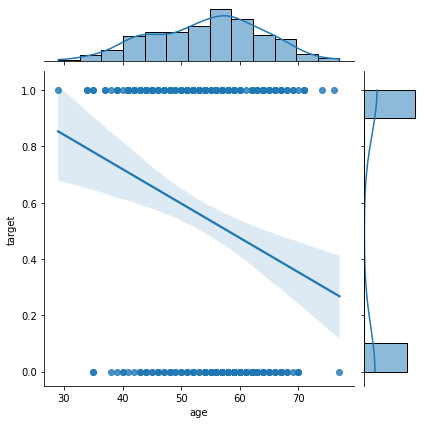

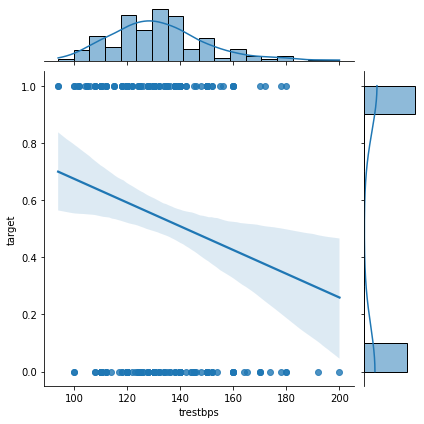

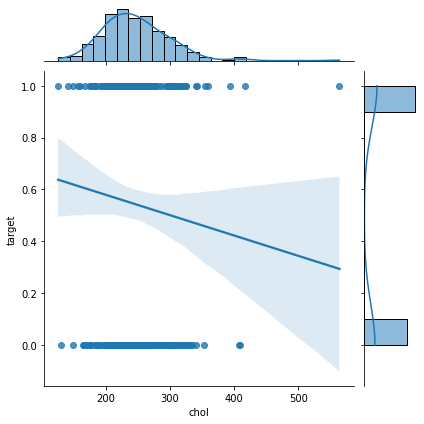

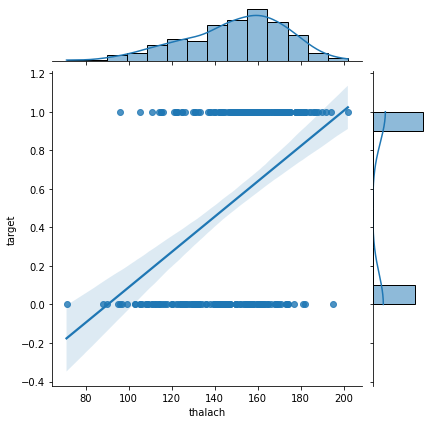

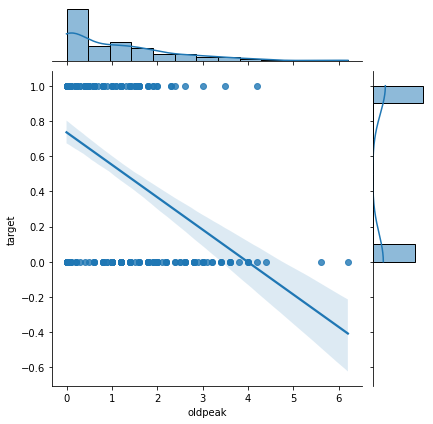

In [ ]:
for col in data.columns.tolist():
  if col not in cate_cols and not col == 'target': 
    sns.jointplot(x =col, y ='target', data = data, kind='reg');
    plt.show()

In [8]:
data_X = data.drop('target', axis=1)
X = pd.get_dummies(data_X) #將所有的類別型變數做 one-hot encoding
y = data.target.values
print(X.shape, y.shape)

(302, 30) (302,)


## ***訓練、驗證集切分與Logistic模型訓練***

In [39]:
train_X, test_X, train_y, test_y = train_test_split(X, y, stratify=y, test_size=0.1, random_state=1)
lgs = LogisticRegression()
lgs.fit(train_X, train_y)

LogisticRegression()

## ***Logistic 模型擬合與模型評估***

In [40]:
y_pred = lgs.predict(test_X)
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93        14
           1       1.00      0.88      0.94        17

    accuracy                           0.94        31
   macro avg       0.94      0.94      0.94        31
weighted avg       0.94      0.94      0.94        31



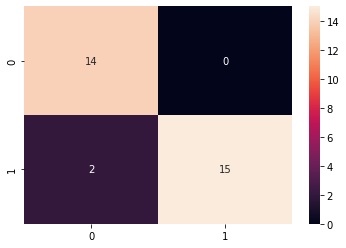

In [11]:
#混淆矩陣視覺化
sns.heatmap(confusion_matrix(test_y, y_pred), annot=True);

In [12]:
#特徵重要度一覽
importance = lgs.coef_[0]
print(importance)

[ 0.01572761 -0.01371745 -0.0039007   0.01533055 -0.33648699  0.72997345
 -0.69240541 -1.17057919 -0.068542    0.65560441  0.62108482 -0.09103899
  0.12860703 -0.09439142  0.11725549  0.01470397  0.25212436 -0.21455632
  0.19891039 -0.66803949  0.50669714  1.46941314 -0.38464701 -0.86846228
 -0.42853859  0.24980277 -0.0855374   0.35402096  0.52153615 -0.75245167]


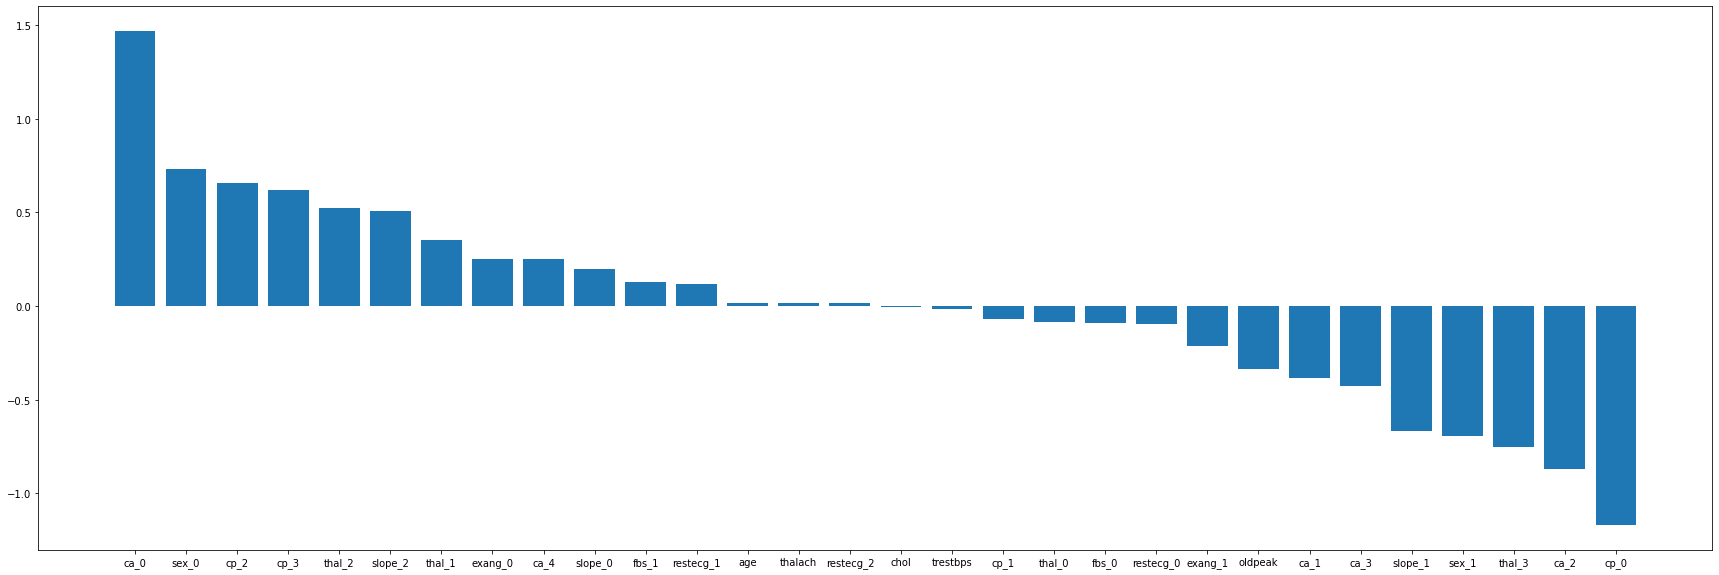

In [13]:
#以重要度重新排序特徵名稱
sorted_ft_importance = sorted(list(zip(importance, X.columns)), key=lambda ft:ft[0], reverse=True)
# 特徵重要度視覺化
plt.figure(figsize=(30, 10))
plt.bar([ft[1] for ft in sorted_ft_importance], [ft[0] for ft in sorted_ft_importance])
plt.show()

# **Conclusion**

1) Extreme Gradient Boost gives the best Accuracy compared to other models.

2) Exercise induced angina,Chest pain is major symptoms of heart attack.

3) Ensembling technique increase the accuracy of the model.

**Feel free to ask any question related to this topic. I'm happy to answer. If you like my work please upvote.**

**HAPPY LEARNING :-)**